In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, complete

In [2]:
df = pd.read_csv("brain_stroke.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


## Hierarchical Clustering

In [5]:
points = df.iloc[:,[1,8]].values
points

array([[67. , 36.6],
       [80. , 32.5],
       [49. , 34.4],
       ...,
       [45. , 31.8],
       [40. , 30. ],
       [80. , 29.1]])

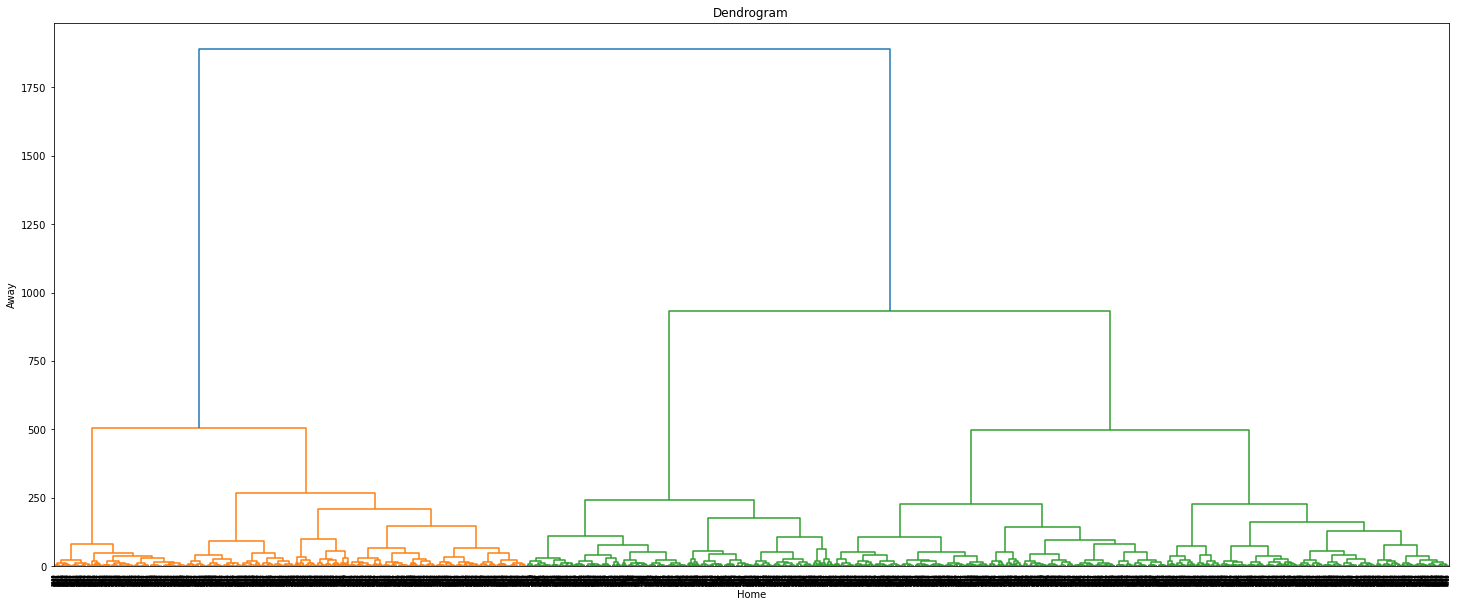

In [6]:
linkage_hieararchical = linkage(points, method='ward')
plt.figure(figsize=(25, 10), facecolor="white")
dendrogram(linkage_hieararchical)
plt.title('Dendrogram')
plt.xlabel('Home')
plt.ylabel('Away')
plt.show()

## K-Means Clustering

In [10]:
model = KMeans(n_clusters=5)
points = df[["age","avg_glucose_level"]]

In [12]:
model.fit(points)
labels = model.labels_
print(labels)

[2 1 2 ... 1 3 4]


In [15]:
dfKmeans = pd.DataFrame({'labels': labels, 'Umur': df.age})
ct = pd.crosstab(dfKmeans["labels"],dfKmeans["Umur"])
print(ct)

Umur    0.08   0.16   0.24   0.32   0.40   0.48   0.56   0.64   0.72   0.80   \
labels                                                                         
0           1      1      2      2      1      1      2      0      2      2   
1           0      0      0      0      0      0      0      0      0      0   
2           0      0      0      0      0      0      0      0      0      0   
3           1      0      3      3      1      2      3      4      3      2   
4           0      0      0      0      0      0      0      0      0      0   

Umur    ...  73.00  74.00  75.00  76.00  77.00  78.00  79.00  80.00  81.00  \
labels  ...                                                                  
0       ...      0      0      0      0      0      0      0      0      0   
1       ...     10      9     14     13     15     32     25     19     14   
2       ...     10      9     19     21     11     24     18     17     16   
3       ...      0      0      0      0      0   

In [16]:
xs = points.iloc[:,1]
ys = points.iloc[:,0]

In [17]:
centroids = model.cluster_centers_

centroids_x = centroids[:,1]
centroids_y = centroids[:,0]

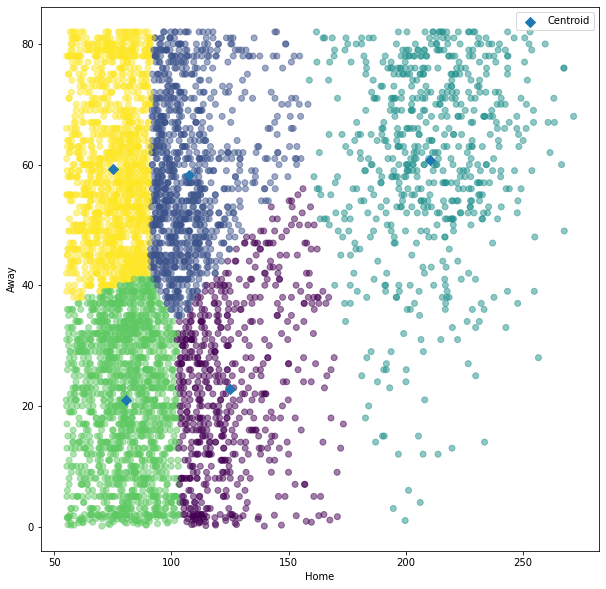

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(xs,ys,alpha=0.5,c=labels)
plt.scatter(centroids_x,centroids_y,marker="D",s=50,label="Centroid")
plt.xlabel("Home")
plt.ylabel("Away")
plt.legend()
plt.show()